In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
train=pd.read_csv('train.csv')

In [24]:
test=pd.read_csv('test.csv')

In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### After exploratory data analysis

### Cleaning Training Data

In [26]:


def impute(features):
    age=features[0] #first of the two columns i.e. age column
    pclass=features[1] #second of the two columns i.e. pclass column
    
    if pd.isnull(age):
        if pclass==1:
            return 37
        elif pclass==2:
            return 29
        else: 
            return 24
    else:
        return age

train['Age']=train[['Age','Pclass']].apply(impute, axis=1)

###### Cabin column has too many missing values, cannot be imputed. Hence, whole column needs to be dropped.

train.drop('Cabin', axis=1, inplace=True)

##### only embarked has two null values left

train.dropna(inplace=True)

##### cleaned heatmap

### Creating dummy variables for ML of categorical columns

sex=pd.get_dummies(train['Sex'], drop_first=True, prefix='Sex') #drop one column otherwise ML algo will mess up, it will understand that one column is perfect predictor of the other

embark=pd.get_dummies(train['Embarked'], drop_first=True, prefix='Embark')

pclass=pd.get_dummies(train['Pclass'], drop_first=True, prefix='Pclass')

train_data=pd.concat([train, sex, embark, pclass], axis=1, join='inner')

train_data.drop(['Name','Pclass', 'Sex','Ticket','Embarked'], axis=1, inplace=True)

In [27]:
train_data.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Sex_male,Embark_Q,Embark_S,Pclass_2,Pclass_3
0,1,0,22.0,1,0,7.2500,1,0,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,0,1
3,4,1,35.0,1,0,53.1000,0,0,1,0,0
4,5,0,35.0,0,0,8.0500,1,0,1,0,1


### Cleaning Test Data

In [30]:
def impute2(features):
    age=features[0] #first of the two columns i.e. age column
    pclass=features[1] #second of the two columns i.e. pclass column
    
    if pd.isnull(age):
        if pclass==1:
            return 42
        elif pclass==2:
            return 27
        else: 
            return 24
    else:
        return age

test['Age']=test[['Age','Pclass']].apply(impute2, axis=1)

test.fillna(value=15,inplace=True) #Fare median=15

tsex=pd.get_dummies(test['Sex'], drop_first=True, prefix='Sex') #drop one column otherwise ML algo will mess up, it will understand that one column is perfect predictor of the other

tembark=pd.get_dummies(test['Embarked'], drop_first=True, prefix='Embark')

tpclass=pd.get_dummies(test['Pclass'], drop_first=True, prefix='Pclass')

test_data=pd.concat([test, tsex, tembark, tpclass], axis=1, join='inner')

test_data.drop(['Name','Cabin','Ticket','Pclass','Sex','Embarked'], axis=1, inplace=True)

### Feature Scaling

In [32]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler=StandardScaler()

In [42]:
scaler.fit(train_data.drop(['PassengerId', 'Survived'], axis=1))

C:\Users\MURK\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [43]:
scaled_arr=scaler.transform(train_data.drop(['PassengerId', 'Survived'], axis=1))

C:\Users\MURK\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [44]:
train.columns[2:]

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked'],
      dtype='object')

In [45]:
scaled_df=pd.DataFrame(scaled_arr, columns=train.columns[2:])

In [46]:
scaled_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,-0.531670,0.431350,-0.474326,-0.500240,0.735342,-0.307941,0.616794,-0.510875,0.900328
1,0.680232,0.431350,-0.474326,0.788947,-1.359911,-0.307941,-1.621287,-0.510875,-1.110706
2,-0.228695,-0.475199,-0.474326,-0.486650,-1.359911,-0.307941,0.616794,-0.510875,0.900328
3,0.453001,0.431350,-0.474326,0.422861,-1.359911,-0.307941,0.616794,-0.510875,-1.110706
4,0.453001,-0.475199,-0.474326,-0.484133,0.735342,-0.307941,0.616794,-0.510875,0.900328


In [50]:
from sklearn.model_selection import train_test_split

X=scaled_df
y=train_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [51]:
from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)

In [52]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[122  41]
 [ 29  75]]


              precision    recall  f1-score   support

           0       0.81      0.75      0.78       163
           1       0.65      0.72      0.68       104

   micro avg       0.74      0.74      0.74       267
   macro avg       0.73      0.73      0.73       267
weighted avg       0.75      0.74      0.74       267



### Elbow method

In [53]:
error_rate=[]

for i in range(1,40):  #1 to 40 nearest neighbors under error test
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))

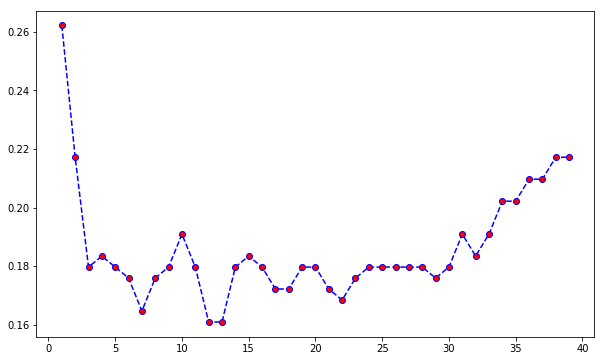

In [54]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, marker='o', ls='--', markerfacecolor='red', color='blue')

In [55]:
knn= KNeighborsClassifier(n_neighbors=26)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[157   6]
 [ 42  62]]


              precision    recall  f1-score   support

           0       0.79      0.96      0.87       163
           1       0.91      0.60      0.72       104

   micro avg       0.82      0.82      0.82       267
   macro avg       0.85      0.78      0.79       267
weighted avg       0.84      0.82      0.81       267



In [56]:
knn= KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[149  14]
 [ 33  71]]


              precision    recall  f1-score   support

           0       0.82      0.91      0.86       163
           1       0.84      0.68      0.75       104

   micro avg       0.82      0.82      0.82       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.82      0.82       267



In [57]:
knn= KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[157   6]
 [ 37  67]]


              precision    recall  f1-score   support

           0       0.81      0.96      0.88       163
           1       0.92      0.64      0.76       104

   micro avg       0.84      0.84      0.84       267
   macro avg       0.86      0.80      0.82       267
weighted avg       0.85      0.84      0.83       267



## KNN ON TEST DATA

In [58]:
test_data.head()

,PassengerId,Age,SibSp,Parch,Fare,Sex_male,Embark_Q,Embark_S,Pclass_2,Pclass_3
0,892,34.5,0,0,7.8292,1,1,0,0,1
1,893,47.0,1,0,7.0000,0,0,1,0,1
2,894,62.0,0,0,9.6875,1,1,0,1,0
3,895,27.0,0,0,8.6625,1,0,1,0,1
4,896,22.0,1,1,12.2875,0,0,1,0,1


In [60]:
scaler2=StandardScaler()

scaler2.fit(test_data.drop(['PassengerId'], axis=1))

scaled_arr2=scaler2.transform(test_data.drop(['PassengerId'], axis=1))

scaled_df2=pd.DataFrame(scaled_arr2, columns=test_data.columns[1:])

C:\Users\MURK\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\MURK\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """


In [61]:
scaled_df2.head()

,Age,SibSp,Parch,Fare,Sex_male,Embark_Q,Embark_S,Pclass_2,Pclass_3
0,0.392624,-0.499470,-0.400248,-0.497441,0.755929,2.843757,-1.350676,-0.534933,0.957826
1,1.355976,0.616992,-0.400248,-0.512306,-1.322876,-0.351647,0.740370,-0.534933,0.957826
2,2.511998,-0.499470,-0.400248,-0.464128,0.755929,2.843757,-1.350676,1.869391,-1.044031
3,-0.185388,-0.499470,-0.400248,-0.482503,0.755929,-0.351647,0.740370,-0.534933,0.957826
4,-0.570729,0.616992,0.619896,-0.417519,-1.322876,-0.351647,0.740370,-0.534933,0.957826


In [62]:
X=scaled_df
y=train_data['Survived']

tknn= KNeighborsClassifier(n_neighbors=13)
tknn.fit(X, y)
preds=tknn.predict(scaled_df2)

In [65]:
len(preds)

418

In [67]:
predictions=pd.DataFrame(preds, columns=['Survived'])

In [68]:
predictions

,Survived
0,0
1,0
2,0
3,0
4,1
5,0
6,1
7,0
8,1
9,0


## MAKE SUBMISSION

In [69]:
mysubmission4=pd.concat([test_data['PassengerId'],predictions], axis=1, join='inner')

In [71]:
mysubmission4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
PassengerId    418 non-null int64
Survived       418 non-null int64
dtypes: int64(2)
memory usage: 6.6 KB


In [72]:
mysubmission4.to_csv(r'mysubmission4.csv', index=False)

## THE END!